#### Importing Libraries

In [2]:
import cpnet as cpnet
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import powerlaw
from scipy.special import factorial
import warnings

warnings.filterwarnings("ignore")

 #### Loading UniSwap Graph

In [28]:
def build_graph():
    df = pd.read_csv('top_1000_by_liquidity.csv')
    edges = pd.DataFrame(
    {
        "source": df["token0.symbol"],
        "target": df["token1.symbol"],
        "weight": df["reserveUSD"],
    }
    )
    G = nx.from_pandas_edgelist(edges, edge_attr=True, create_using=nx.Graph().to_undirected())
    return G


G = build_graph()

#### Computing Graph Properties

In [18]:
def operate_on_graph(g):

    """Operate on Graph

    This function computes the following properties of the network:
        Degree Assortativity, Average Shortest Path Length, Diameter of the graph, and Average Clustering of the Graph

    For the average shortest path length property, the giant component of the subgraph is used

    :param g: networkx graph object
    :return: The respective properties of the network
    """

    total_subgraphs = list(g.subgraph(c) for c in nx.connected_components(g))
    sorted_subgraph_list = sorted(total_subgraphs, key=len, reverse=True)
    giant_subgraph = sorted_subgraph_list[0]

    g_dac = nx.degree_assortativity_coefficient(g)

    g_aspl = nx.average_shortest_path_length(
        giant_subgraph
    )  # todo: ask prakhar what's the haps here!
    g_dia = nx.diameter(giant_subgraph)
    g_clustering = nx.average_clustering(g)
    return g_dac, g_aspl, g_dia, g_clustering


g_dac, g_aspl, g_dia, g_clustering = operate_on_graph(G)

In [20]:
print(
    f"The properties of the graph are: \nDegree Assortativity: {g_dac}\nAverage Shortest Path Length: {g_aspl}\nDiameter of the graph: {g_dia}\nAverage Clustering of the Graph: {g_clustering}"
)

The properties of the graph are: 
Degree Assortativity: -0.6698177474274225
Average Shortest Path Length: 2.27879544508758
Diameter of the graph: 6
Average Clustering of the Graph: 0.05634594524908006


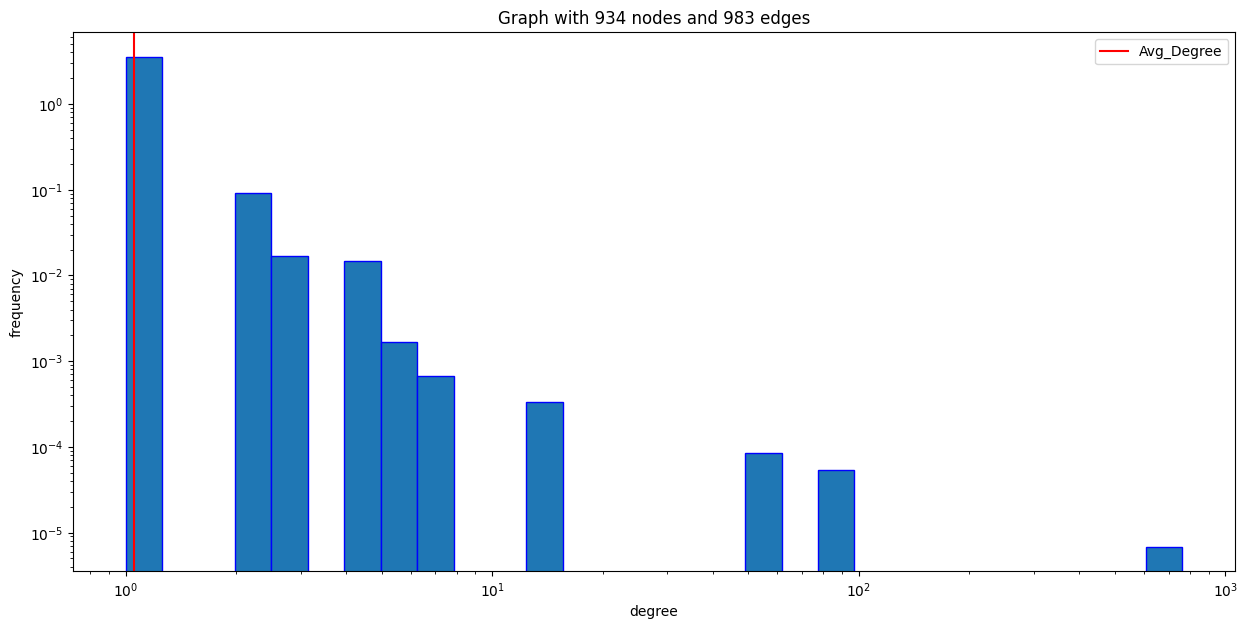

In [21]:
def plot_degree_distribution(g):
    """Plot Degree Distribution

    This function plots the degree distribution of the input graph

    :param g: the input graph
    :return: plot of the degree distribution of the input graph
    """
    degrees = [g.degree(n) for n in g.nodes()]
    sum_of_edges = g.number_of_edges()
    no_of_nodes = g.number_of_nodes()
    avg_degree = sum_of_edges / no_of_nodes
    my_bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees) + 1), 30)
    plt.figure(figsize=(15, 7))
    plt.hist(degrees, bins=my_bins, density="True", ec="b")
    plt.axvline(x=avg_degree, color="r", label="Avg_Degree")
    plt.legend()
    plt.xlabel("degree")
    plt.ylabel("frequency")
    plt.title(g)
    plt.xscale("log")
    plt.yscale("log")
    plt.show()


plot_degree_distribution(G)

{'UETH': 0, 'ULCK': 0, 'WISE': 0, 'WETH': 1, 'USDC': 1, 'DAI': 0, 'USDT': 0, 'DELTA': 0, 'FNK': 0, 'RK:ETH': 0, 'ROOT': 0, 'MC': 0, 'UNI': 0, 'PAXG': 0, 'ETH2POS': 0, 'DC': 0, 'FEI': 0, 'TRIBE': 0, 'FXS': 0, 'FRAX': 0, 'DBL': 0, 'BLUE': 0, 'ELON': 0, 'HANU': 0, 'GOJ': 0, 'MIA': 0, 'XXi': 0, 'vUSD': 0, 'VOW': 0, 'CAW': 0, 'WBTC': 0, 'MT': 0, 'ACR': 0, 'BigSB': 0, 'ASTO': 0, 'M2': 0, 'wPE': 0, 'WAXE': 0, 'SUPER': 0, 'BTT': 0, 'UFO': 0, 'DAPE': 0, 'ULS': 0, 'TERA': 0, 'FOX': 0, 'eXRD': 0, 'FLX': 0, 'HIGH': 0, 'SHINJA': 0, 'RAD': 0, 'STARL': 0, 'ERN': 0, 'DG': 0, 'CULT': 0, 'WOO': 0, 'VOLT': 0, 'BOND': 0, 'SAITAMA': 0, 'O': 0, 'PNK': 0, 'ShibDoge': 0, 'HEZ': 0, 'DFI': 0, 'WILD': 0, 'RAI': 0, 'X2Y2': 0, 'AMPL': 0, 'DOGE': 0, 'FLOKI': 0, 'LINK': 0, 'UNIX': 0, 'SAND': 0, 'LON': 0, 'WDOGE': 0, 'QOM': 0, 'PAX': 0, 'SWFL': 0, 'RLY': 0, '⚗️': 0, 'POLS': 0, 'XFI': 0, 'XFIT': 0, 'AUDIO': 0, 'MMAI': 0, 'GLM': 0, 'BHNY': 0, 'INU': 0, 'DEXT': 0, 'ALPHA': 0, 'WCI': 0, 'BREED': 0, 'DETS': 0, 'BOOST': 0,

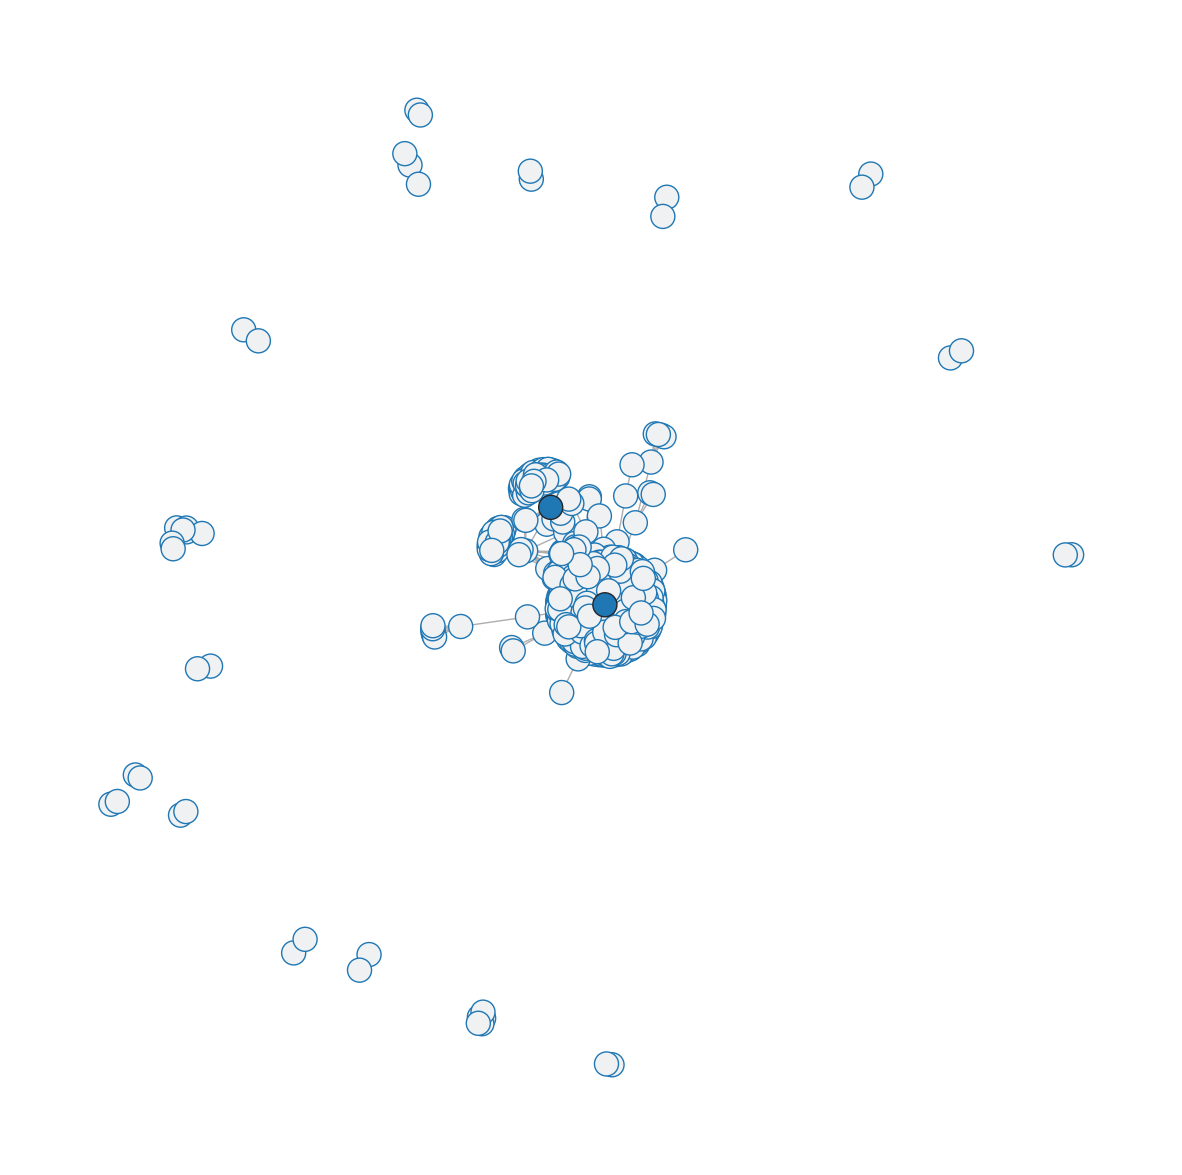

In [26]:
def core_periphery_detection_BE(g):
    """Core Periphery Detection

    This function detects and computes the core nodes and the periphery nodes of the input graph and plots it as per the Borgatti-Everett algorithm

    :param g: the input graph
    :return: the plot of the core periphery of the input graph
    """

    alg = cpnet.BE()
    alg.detect(g)
    x = alg.get_coreness()
    c = alg.get_pair_id()
    print(x, c)
    fig = plt.figure(figsize=(15, 15))
    ax = plt.gca()
    ax, pos = cpnet.draw(g, c, x, ax)


core_periphery_detection_BE(G)

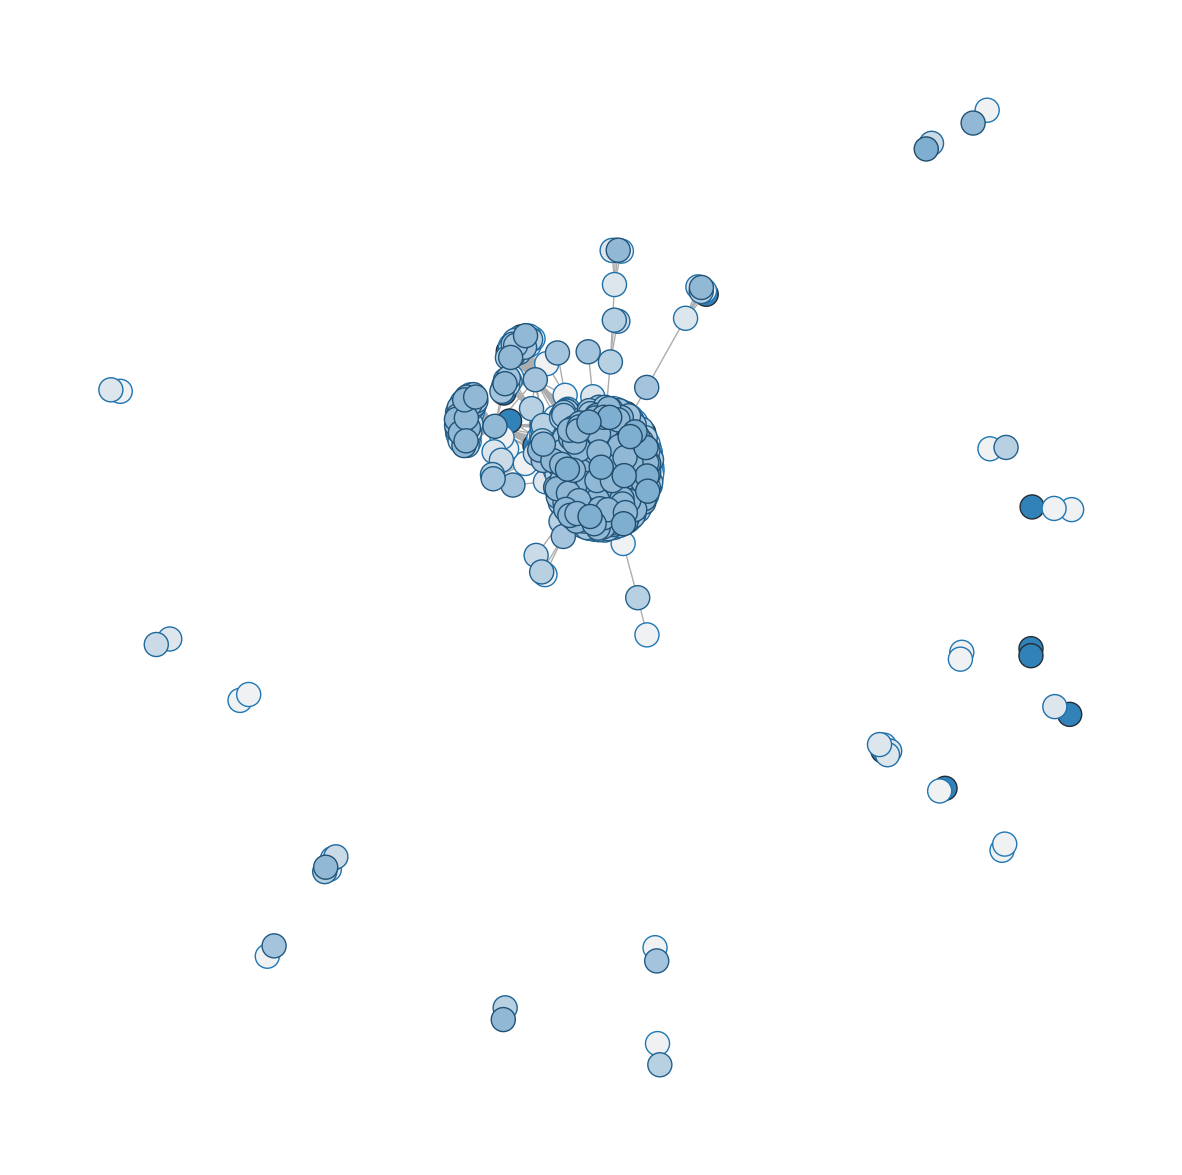

In [24]:
def core_periphery_detection_MINRES(g):
    """Core Periphery Detection

    This function computes a continuous core periphery structure where each node has a different level or core-ness between 0 and 1. This is computed as per the Minimal Residual Method algorithm.

    :param g: the input graph
    :return: the plot of the core periphery of the input graph
    """

    alg = cpnet.MINRES()
    alg.detect(g)
    x = alg.get_coreness()
    c = alg.get_pair_id()
    fig = plt.figure(figsize=(15, 15))
    ax = plt.gca()
    ax, pos = cpnet.draw(g, c, x, ax)


core_periphery_detection_MINRES(G)

{'UETH': 1, 'ULCK': 0, 'WISE': 1, 'WETH': 0, 'USDC': 1, 'DAI': 1, 'USDT': 1, 'DELTA': 1, 'FNK': 0, 'RK:ETH': 1, 'ROOT': 0, 'MC': 1, 'UNI': 1, 'PAXG': 0, 'ETH2POS': 1, 'DC': 0, 'FEI': 0, 'TRIBE': 1, 'FXS': 1, 'FRAX': 0, 'DBL': 1, 'BLUE': 0, 'ELON': 1, 'HANU': 1, 'GOJ': 0, 'MIA': 0, 'XXi': 1, 'vUSD': 0, 'VOW': 1, 'CAW': 1, 'WBTC': 1, 'MT': 1, 'ACR': 0, 'BigSB': 0, 'ASTO': 0, 'M2': 1, 'wPE': 0, 'WAXE': 1, 'SUPER': 1, 'BTT': 1, 'UFO': 1, 'DAPE': 0, 'ULS': 0, 'TERA': 1, 'FOX': 1, 'eXRD': 0, 'FLX': 0, 'HIGH': 1, 'SHINJA': 1, 'RAD': 0, 'STARL': 1, 'ERN': 1, 'DG': 0, 'CULT': 1, 'WOO': 0, 'VOLT': 1, 'BOND': 0, 'SAITAMA': 1, 'O': 0, 'PNK': 1, 'ShibDoge': 1, 'HEZ': 0, 'DFI': 0, 'WILD': 1, 'RAI': 1, 'X2Y2': 1, 'AMPL': 1, 'DOGE': 0, 'FLOKI': 1, 'LINK': 1, 'UNIX': 0, 'SAND': 0, 'LON': 1, 'WDOGE': 1, 'QOM': 1, 'PAX': 1, 'SWFL': 1, 'RLY': 1, '⚗️': 1, 'POLS': 1, 'XFI': 1, 'XFIT': 0, 'AUDIO': 1, 'MMAI': 1, 'GLM': 0, 'BHNY': 1, 'INU': 0, 'DEXT': 1, 'ALPHA': 1, 'WCI': 1, 'BREED': 1, 'DETS': 1, 'BOOST': 1,

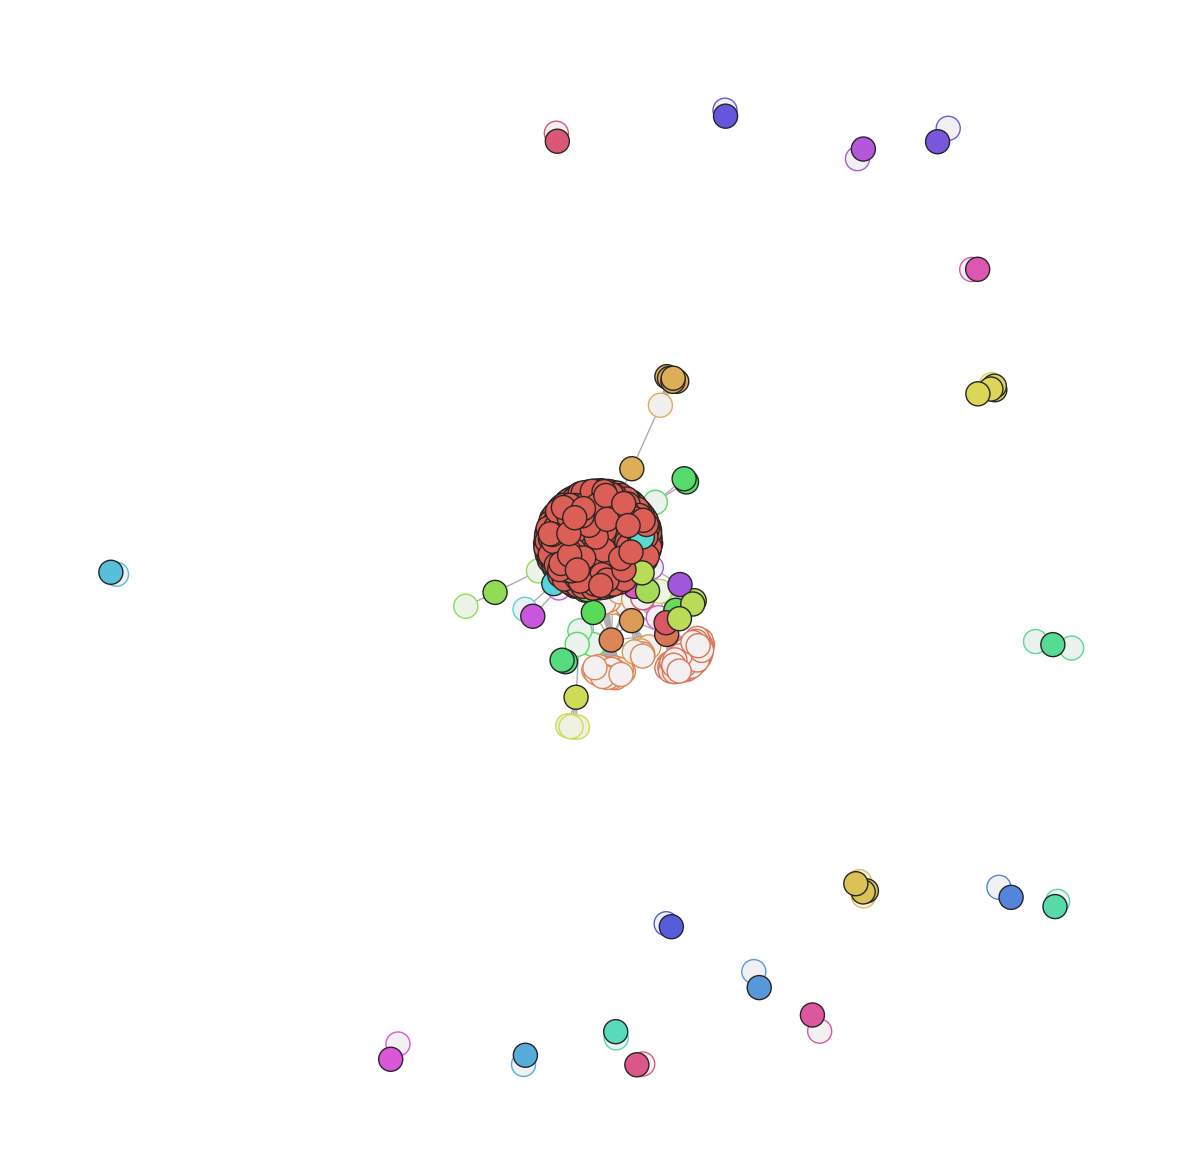

In [28]:
def core_periphery_detection_KM(g):
    """Core Periphery Detection

    This function allows for multiple cores and peripheries using the KM config algorithm

    :param g: the input graph
    :return: the plot of the core periphery of the input graph
    """

    alg = cpnet.KM_config()
    alg.detect(g)
    x = alg.get_coreness()
    c = alg.get_pair_id()
    print(x)
    fig = plt.figure(figsize=(15, 15))
    ax = plt.gca()
    ax, pos = cpnet.draw(g, c, x, ax)


core_periphery_detection_KM(G)

### Degree Distribution - Power Law

In [29]:
def degree_array(g: nx.Graph) -> np.array:
    """
    List of degrees of a nx.Graph
    """
    return np.array([degree for node, degree in g.degree()])


def average_degree(g: nx.Graph) -> np.float64:
    """
    Average degree ⟨k⟩ of a network.
    """
    return np.mean(degree_array(g))


def linear_spacing(array):
    return np.linspace(min(array), max(array), len(array))


def power_law_fn(x, alpha):
    return x ** (-alpha)


def poisson(k, lam):
    return (lam**k / factorial(k)) * np.exp(-lam)


def exponential(k, lam):
    return (1 / lam) * np.exp(-k / lam)


def print_degree_distribution(g):
    sorted_degrees = np.sort(degree_array(g))
    avg_degree = average_degree(g)
    spacing = linear_spacing(sorted_degrees)

    fit = powerlaw.Fit(sorted_degrees, discrete=True)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    print("alpha: {}".format(alpha))
    print("error: {}".format(sigma))
    print("avg degree: {}".format(avg_degree))

    powerlaw.plot_pdf(
        sorted_degrees, color="b", marker="o", label="empirical degree dist"
    )
    plt.plot(spacing, power_law_fn(spacing, alpha), label="power_law_fit")
    plt.plot(spacing, exponential(spacing, avg_degree), label="exponential")
    plt.plot(spacing, poisson(spacing, avg_degree), label="poisson")
    plt.grid(True, which="both", ls="-")
    plt.ylim(10 ** (-10), 1)
    plt.xlabel("degree")
    plt.ylabel("density")
    plt.title("Degree distributions of the DeFi Network")
    plt.legend()
    plt.show()

Calculating best minimal value for power law fit
alpha: 2.4015587022212843
error: 0.16183805880250418
avg degree: 2.1049250535331905


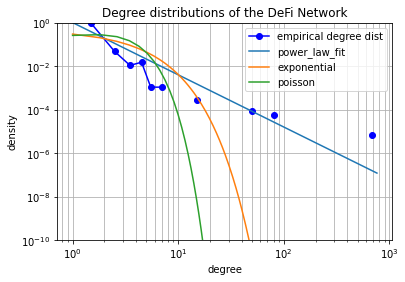

In [30]:
print_degree_distribution(G)

### Strength Distribution - Power Law

In [37]:
def strength_array(g: nx.Graph) -> np.array:
    """
    List of strengths of a nx.Graph
    """
    return np.array([degree for node, degree in g.degree(weight='weight')])

def average_strength(g: nx.Graph) -> np.float64:
    """
    Average strength ⟨s⟩ of a network.
    """
    return np.mean(strength_array(g))


def print_strength_distribution(g):
    sorted_strengths = np.sort(strength_array(g))
    avg_strength = average_strength(g)
    spacing = linear_spacing(sorted_strengths)

    fit = powerlaw.Fit(sorted_strengths, discrete=True)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    print("alpha: {}".format(alpha))
    print("error: {}".format(sigma))
    print("avg degree: {}".format(avg_strength))

    powerlaw.plot_pdf(
        sorted_strengths, color="b", marker="o", label="empirical degree dist"
    )
    plt.plot(spacing, power_law_fn(spacing, alpha), label="power_law_fit")
    plt.plot(spacing, exponential(spacing, avg_strength), label="exponential")
    plt.plot(spacing, poisson(spacing, avg_strength), label="poisson")
    plt.grid(True, which="both", ls="-")
    plt.ylim(10 ** (-20), 10 ** (3))
    plt.xlabel("degree")
    plt.ylabel("density")
    plt.title("Strength distributions of the DeFi Network")
    plt.legend()
    plt.show()

Calculating best minimal value for power law fit
alpha: 1.843679726279426
error: 0.03358635959386646
avg degree: 6322528.09947474


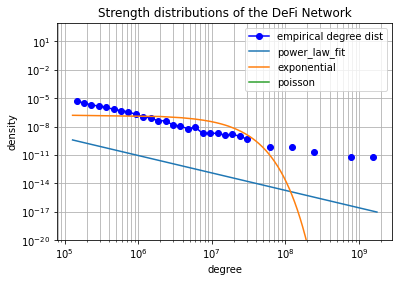

In [38]:
print_strength_distribution(G)